In [1]:
import os
os.chdir("/home/tangir/crmbm/python/pastis")

from IPython import get_ipython
get_ipython().magic("clear")

import matplotlib.pylab as plt
import mrs.log as log
import numpy as np
import pandas as pd
import seaborn as sns

plt.close("all")
plt.rcParams['figure.dpi'] = 75
plt.rcParams['figure.max_open_warning'] = 1000
plt.rcParams["figure.figsize"] = [8, 6]
# get_ipython().magic("matplotlib inline")
get_ipython().magic("matplotlib notebook")
log.setLevel(log.INFO)

pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

(DEBUG) Loaded backend nbAgg version unknown.


# Read dataframes

In [2]:
# reconstructed data
df_reco = pd.read_pickle("/home/tangir/crmbm/acq_db/lipids.pkl")
df_reco

,reco_dataset_legend,reco_dataset_physio_file,reco_dataset_imaging_file,reco_dataset_resp_bpm,reco_dataset_heart_bpm,reco_dataset_comment,reco_dataset_raw_files,reco_dataset_raw_data,reco_dataset_raw_analysis_results,reco_dataset_raw_ref_data_analysis_results,...,reco_job_ref_data_analyzing_snr_magnitude_mode,reco_job_ref_data_analyzing_snr_display,reco_job_ref_data_analyzing_snr_display_range_ppm,reco_job_ref_data_analyzing_lw_job_func,reco_job_ref_data_analyzing_lw_job_name,reco_job_ref_data_analyzing_lw_POI_ref_range_ppm,reco_job_ref_data_analyzing_lw_magnitude_mode,reco_job_ref_data_analyzing_lw_display,reco_job_ref_data_analyzing_lw_display_range_ppm,timestamp
dataset_dcm_data_file_hash,,,,,,,,,,,,,,,,,,,,,
37fe49563854932838805dbe5b465681,#0 Histo T2 estimation 23/04/2021,None,None,None,None,None,"[None, None]",None,None,None,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
297e113724498357bfaf388aedf4d5f1,#1 Histo T2 estimation 23/04/2021,None,None,None,None,None,"[None, None]",None,None,None,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
7a2e23e232e74bb1f9470e0c733eeb09,#2 Histo T2 estimation 23/04/2021,None,None,None,None,None,"[None, None]",None,None,None,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
7dcbd481e22a770e2ccedd213f65dd41,#3 Histo T2 estimation 23/04/2021,None,None,None,None,None,"[None, None]",None,None,None,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
02720552c0252baa8f84c32fb43a490a,#4 Histo T2 estimation 23/04/2021,None,None,None,None,None,"[None, None]",None,None,None,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832


In [3]:
# fit results
df_fit = pd.read_pickle("/home/tangir/crmbm/acq_db/lipids_fit.pkl")
df_fit

,,fit_name,fit_sequence,fit_metabolites,fit_metabolites_area_integration,fit_params_linklock,fit__water_only,fit_optim_jacobian,fit_optim_ppm_range,fit_optim_xtol,fit_optim_ftol,...,fit_params_area_pnorm_dp|LipI1|val,fit_params_area_pnorm_dp|LipI1|err,fit_params_area_pnorm_cm|LipJ1|val,fit_params_area_pnorm_cm|LipJ1|err,fit_params_area_pnorm_dd|LipJ1|val,fit_params_area_pnorm_dd|LipJ1|err,fit_params_area_pnorm_df|LipJ1|val,fit_params_area_pnorm_df|LipJ1|err,fit_params_area_pnorm_dp|LipJ1|val,fit_params_area_pnorm_dp|LipJ1|err
fit_fit_hash,fit_data_file_hash,,,,,,,,,,,,,,,,,,,,,
0f41d6c7c45001e2221690a004445015,37fe49563854932838805dbe5b465681,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2c9c590>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a3b865281f175a9817def3a66c279df2,297e113724498357bfaf388aedf4d5f1,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba86d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60dfe7e99732a701c5e15b1c9a761eda,7a2e23e232e74bb1f9470e0c733eeb09,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba89d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b1c88c8c490db71b0e6aebe5603d8ca9,7dcbd481e22a770e2ccedd213f65dd41,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9fb787790>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419ffb801e3c6520862c745e9665987f,02720552c0252baa8f84c32fb43a490a,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba8c90>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# join fit results to data
df = pd.merge(df_fit, df_reco, left_on='fit_data_file_hash', right_index=True, how='inner', sort=False)
df

,,fit_name,fit_sequence,fit_metabolites,fit_metabolites_area_integration,fit_params_linklock,fit__water_only,fit_optim_jacobian,fit_optim_ppm_range,fit_optim_xtol,fit_optim_ftol,...,reco_job_ref_data_analyzing_snr_magnitude_mode,reco_job_ref_data_analyzing_snr_display,reco_job_ref_data_analyzing_snr_display_range_ppm,reco_job_ref_data_analyzing_lw_job_func,reco_job_ref_data_analyzing_lw_job_name,reco_job_ref_data_analyzing_lw_POI_ref_range_ppm,reco_job_ref_data_analyzing_lw_magnitude_mode,reco_job_ref_data_analyzing_lw_display,reco_job_ref_data_analyzing_lw_display_range_ppm,timestamp
fit_fit_hash,fit_data_file_hash,,,,,,,,,,,,,,,,,,,,,
0f41d6c7c45001e2221690a004445015,37fe49563854932838805dbe5b465681,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2c9c590>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
a3b865281f175a9817def3a66c279df2,297e113724498357bfaf388aedf4d5f1,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba86d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
60dfe7e99732a701c5e15b1c9a761eda,7a2e23e232e74bb1f9470e0c733eeb09,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba89d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
b1c88c8c490db71b0e6aebe5603d8ca9,7dcbd481e22a770e2ccedd213f65dd41,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9fb787790>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832
419ffb801e3c6520862c745e9665987f,02720552c0252baa8f84c32fb43a490a,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba8c90>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,False,False,"[0, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832


# Convert this 'tidy/wide' dataframe to 'long'

In [5]:
# find all columns which are not params
id_vars_list = []
for c in df.columns:
    if(("_params_" not in c) or (df[c].dtype == 'O')):
        id_vars_list.append(c)
            
# melt all those param columns
df = df.melt(id_vars=id_vars_list, var_name="melted_params_name", value_name="param_value")         

# split columns into metabolite and parameter name and err
melted_params_name_col = df["melted_params_name"]

# value or link or error
melted_params_name_col_val_type = melted_params_name_col.str.split("|").str[-1]
# metabolite name
melted_params_name_col_met_name = melted_params_name_col.str.split("|").str[-2]
# parameter name
melted_params_name_col_par_name = melted_params_name_col.str.split("|").str[-3]

# nice column names
df["param_type"] = melted_params_name_col_val_type
df["param_metabolite"] = melted_params_name_col_met_name
df["param_name"] = melted_params_name_col_par_name
df

,fit_name,fit_sequence,fit_metabolites,fit_metabolites_area_integration,fit_params_linklock,fit__water_only,fit_optim_jacobian,fit_optim_ppm_range,fit_optim_xtol,fit_optim_ftol,...,reco_job_ref_data_analyzing_lw_POI_ref_range_ppm,reco_job_ref_data_analyzing_lw_magnitude_mode,reco_job_ref_data_analyzing_lw_display,reco_job_ref_data_analyzing_lw_display_range_ppm,timestamp,melted_params_name,param_value,param_type,param_metabolite,param_name
0,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2c9c590>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
1,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba86d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
2,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba89d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
3,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9fb787790>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
4,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba8c90>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2c9c590>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp
5756,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba86d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp
5757,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba89d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp
5758,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9fb787790>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp


# Fit lipids T2s

## Extract fit results for "Histo T2 estimation" datasets

In [6]:
df = df.loc[ (df["reco_dataset_legend"].str.contains("Histo T2 estimation")) ]
df

,fit_name,fit_sequence,fit_metabolites,fit_metabolites_area_integration,fit_params_linklock,fit__water_only,fit_optim_jacobian,fit_optim_ppm_range,fit_optim_xtol,fit_optim_ftol,...,reco_job_ref_data_analyzing_lw_POI_ref_range_ppm,reco_job_ref_data_analyzing_lw_magnitude_mode,reco_job_ref_data_analyzing_lw_display,reco_job_ref_data_analyzing_lw_display_range_ppm,timestamp,melted_params_name,param_value,param_type,param_metabolite,param_name
0,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2c9c590>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
1,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba86d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
2,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba89d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
3,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9fb787790>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
4,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba8c90>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_min_cm|Water|val,0.0,val,Water,fit_params_min_cm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2c9c590>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp
5756,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba86d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp
5757,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9e2ba89d0>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp
5758,fitting T2w mrs,<mrs.sim.mrs_seq_svs_st object at 0x7fa9fb787790>,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.0, 0.0, 0.0, 0.0], [0.0, -200.0, 0.0, -100...",False,True,"[0, 6]",1.000000e-09,1.000000e-09,...,"[4.5, 5.2]",False,False,"[0, 6]",2021-05-04 11:22:32.055832,fit_params_area_pnorm_dp|LipJ1|err,0.0,err,LipJ1,fit_params_area_pnorm_dp


## For each metabolite, extract fitted concentration, corresponding TE and fit T2s

<IPython.core.display.Javascript object>


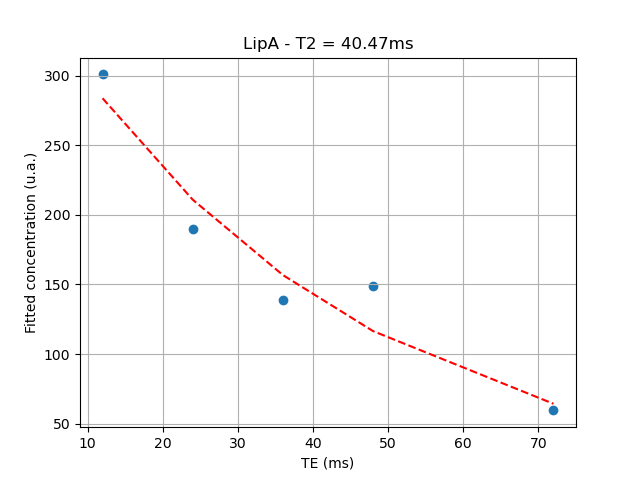

<IPython.core.display.Javascript object>


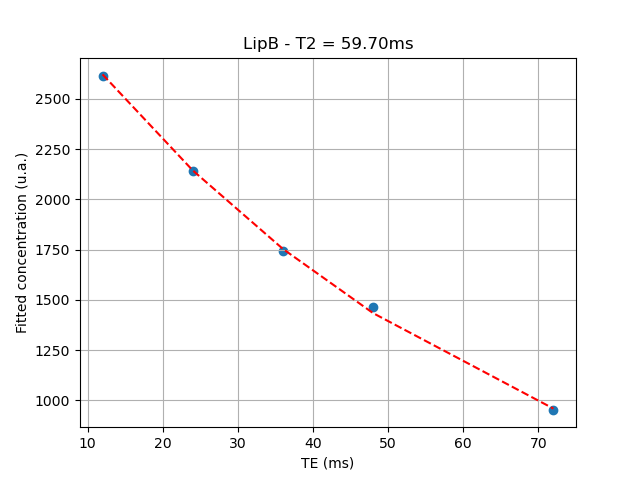

<IPython.core.display.Javascript object>


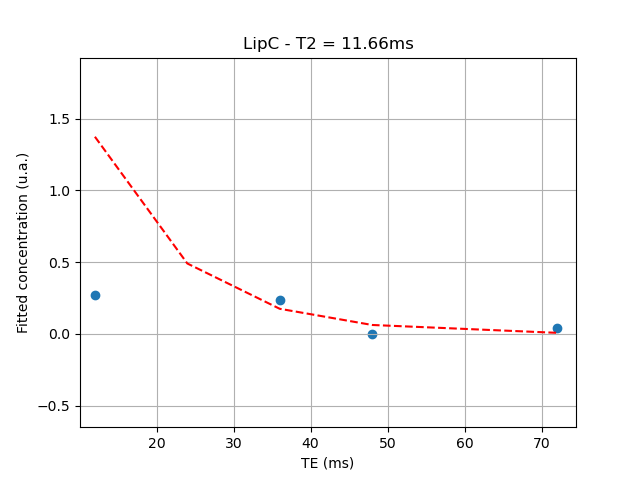

<IPython.core.display.Javascript object>


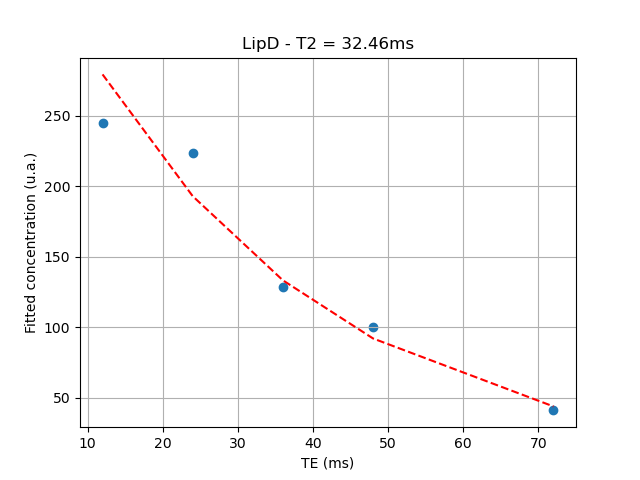

<IPython.core.display.Javascript object>


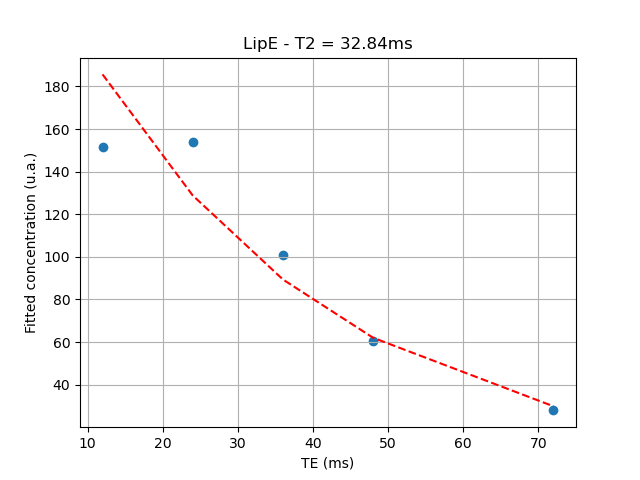

<IPython.core.display.Javascript object>


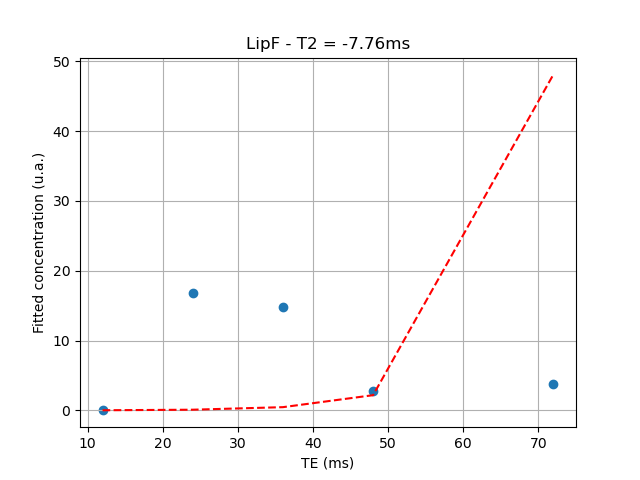

<IPython.core.display.Javascript object>


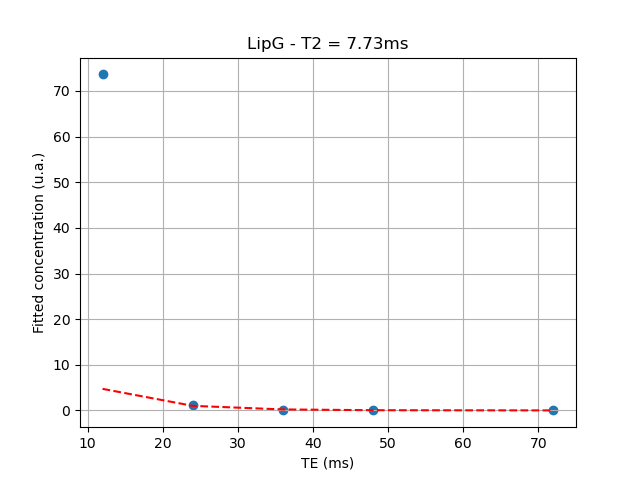

<IPython.core.display.Javascript object>


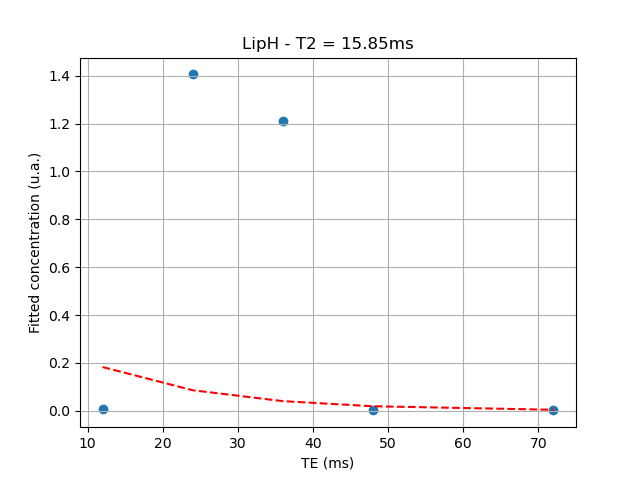

<IPython.core.display.Javascript object>


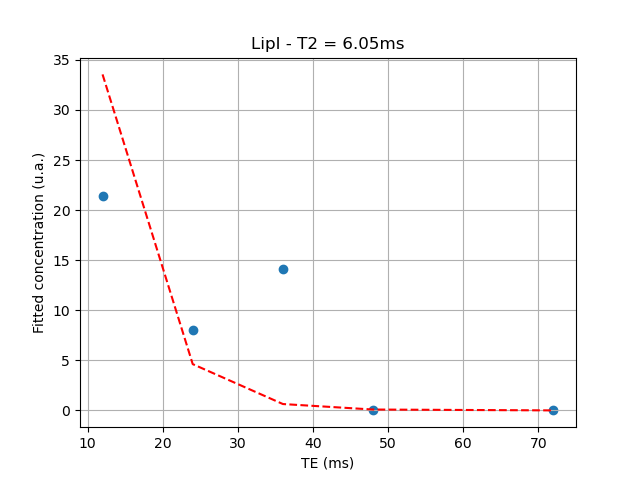

<IPython.core.display.Javascript object>


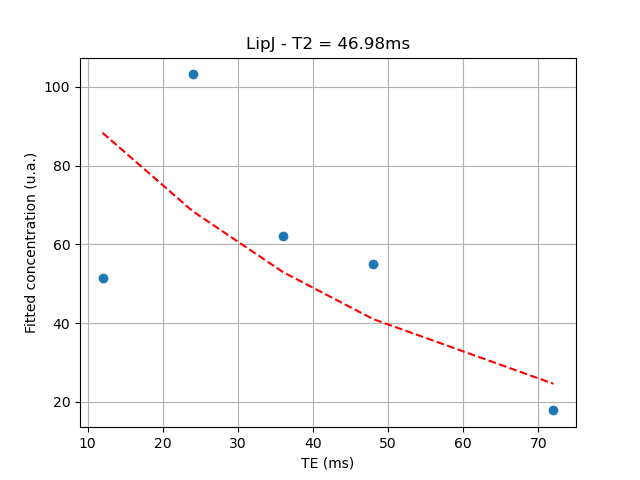

In [7]:
# keep only LipA to LipJ, the rest was not fitted
metabolite_names = ["LipA",
                    "LipB",
                    "LipC",
                    "LipD",
                    "LipE",
                    "LipF",
                    "LipG",
                    "LipH",
                    "LipI",
                    "LipJ"]

df_list = []
for m in metabolite_names:
    this_metabolite_df = df.loc[ (df["param_type"] == "val") &  # find values, not errors
                      (df["param_metabolite"] == m) &  # for this metabolite
                      (df["param_name"] == "fit_params_fit_cm")  # resulting from fit
                    ]   
    
    # get TEs and sort them
    te_arr = np.array(this_metabolite_df["reco_dataset_dcm_data_sequence_te"].tolist())
    ind_te_sort = np.argsort(te_arr)
    te_arr = te_arr[ind_te_sort]
    
    # get concentration values
    concentrations_arr = np.array(this_metabolite_df["param_value"].tolist())
    concentrations_arr = concentrations_arr[ind_te_sort]
     
    # T2 'fit'
    concetrations_log_arr = np.log(concentrations_arr)
    # regression with polyfit
    b, a = np.polynomial.polynomial.polyfit(te_arr, concetrations_log_arr, 1)
    # fitted T2
    T2 = -1 / a
    fitted_exp_arr = np.exp(b) * np.exp(-te_arr / T2)

    # store
    df_list.append(pd.DataFrame.from_dict({"Metabolite": [m], "T2 found (ms)": [T2]}))
    
    # scatter plot
    fig = plt.figure()
    fig.clf()
    axs = fig.subplots()
    axs.scatter(te_arr, concentrations_arr)
    axs.plot(te_arr, fitted_exp_arr, 'r--')
    axs.set_xlabel('TE (ms)')
    axs.set_ylabel('Fitted concentration (u.a.)')
    axs.set_title("%s - T2 = %.2fms" % (m, T2))
    axs.grid('on')

df_T2s = pd.concat(df_list)


In [8]:
df_T2s

,Metabolite,T2 found (ms)
0,LipA,40.470944
0,LipB,59.698052
0,LipC,11.662701
0,LipD,32.459666
0,LipE,32.836310
0,LipF,-7.755268
0,LipG,7.732431
0,LipH,15.846993
0,LipI,6.053073
0,LipJ,46.981551
